This notebook goes through the historical data of positive, cured and death cases in the state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = pd.read_csv("chronoPositiv.csv") # DATA.
p

,Date,District,PersonType,NumberOfPatients,PresentStatus,Remarks,DischargedDate
0,09/03/20,Thrissur,native,1,negative,discharged,17/03/20
1,09/03/20,Alappuzha,native,1,negative,discharged,17/03/20
2,09/03/20,Kasargod,native,1,negative,discharged,17/04/20
3,09/03/20,Pathanamthitta,native,5,negative,discharged,01/04/20
4,09/03/20,Ernakulam,native,1,negative,discharged,27/03/20
5,10/03/20,Kottayam,native,2,negative,discharged,12/04/20
6,10/03/20,Pathanamthitta,native,3,negative,discharged,12/04/20
7,10/03/20,Pathanamthitta,native,1,negative,discharged,25/04/20
8,10/03/20,Ernakulam,native,2,negative,discharged,12/04/20
9,12/03/20,Kannur,native,1,negative,discharged,24/03/20


In [3]:
p.info() # Basic information about the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 7 columns):
Date                711 non-null object
District            706 non-null object
PersonType          706 non-null object
NumberOfPatients    711 non-null int64
PresentStatus       706 non-null object
Remarks             706 non-null object
DischargedDate      485 non-null object
dtypes: int64(1), object(6)
memory usage: 39.0+ KB


In [4]:
# 'Date' column is in object format.Change that into datetime.

p['Date'] = pd.to_datetime(p['Date'], dayfirst=True) #.dt.strftime('%d/%m/%Y')

# setting index to 'Date'
p.set_index('Date',inplace=True)

In [5]:
p.head(5)

,District,PersonType,NumberOfPatients,PresentStatus,Remarks,DischargedDate
Date,,,,,,
2020-03-09,Thrissur,native,1,negative,discharged,17/03/20
2020-03-09,Alappuzha,native,1,negative,discharged,17/03/20
2020-03-09,Kasargod,native,1,negative,discharged,17/04/20
2020-03-09,Pathanamthitta,native,5,negative,discharged,01/04/20
2020-03-09,Ernakulam,native,1,negative,discharged,27/03/20


In [6]:
#p[(p.PresentStatus =='positive') & (p.Remarks=='discharged')]

In [7]:
# Statuses against 'Remarks'.
print(p.Remarks.value_counts().index)

# Taking all the statuses as label. 
#label = list(p.Remarks.value_counts().index)
label = [ 'under_treatment','discharged', 'to_be_discharged', 'expired']

Index(['discharged', 'under_treatment', 'to_be_discharged', 'expired'], dtype='object')


In [8]:
# Number of each cases.
print("no. of patients currently under treatment= ", p[p.Remarks=='under_treatment'].NumberOfPatients.sum())
print("no. of patients cured/discharged= ", p[p.Remarks=='discharged'].NumberOfPatients.sum())
print("no. of patients cured & to be discharged soon= ", p[p.Remarks=='to_be_discharged'].NumberOfPatients.sum())
print("no. of patients passed away= ", p[p.Remarks=='expired'].NumberOfPatients.sum())

no. of patients currently under treatment=  984
no. of patients cured/discharged=  620
no. of patients cured & to be discharged soon=  81
no. of patients passed away=  14


In [9]:
# Creating a list of number of cases in each statuses in Remarks.

Current_status = [p[p.Remarks=='under_treatment'].NumberOfPatients.sum(),
      p[p.Remarks=='discharged'].NumberOfPatients.sum(),
      p[p.Remarks=='to_be_discharged'].NumberOfPatients.sum(),            
    p[p.Remarks=='expired'].NumberOfPatients.sum()]


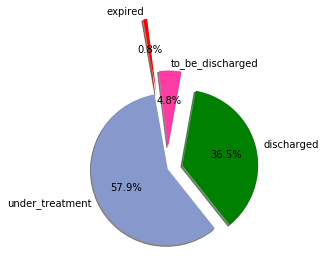

In [10]:
# Pie chart showing percentage of positive cases  under treatment, discharged, to be discharged and deaths.

plt.pie(Current_status, explode= (0,0.2,0.3,1) , labels=label , colors= ['#8799cc','g','#fd3ca3','r'] , autopct='%1.1f%%',
        shadow=True, startangle=100)
plt.tight_layout()
plt.show()

In [11]:
# Districtwise status of patients.
Dist2 = p.groupby(["District", "Remarks"]).agg(np.sum)
Dist2["District"]  = Dist2.index
Dist2

NumberOfPatients  \
District           Remarks                              
Alappuzha          discharged                       8   
                   expired                          1   
                   to_be_discharged                 4   
                   under_treatment                 66   
Ernakulam          discharged                      27   
                   expired                          1   
                   to_be_discharged                 3   
                   under_treatment                 42   
Idukki             discharged                      25   
                   under_treatment                 21   
Kannur             discharged                     126   
                   expired                          1   
                   to_be_discharged                 8   
                   under_treatment                103   
Kasargod           discharged                     197   
                   to_be_discharged                17   
                   under_treatment                101   
Kollam             discharged                      24   
                   expired                          1   
                   to_be_discharged                 1   
                   under_treatment                 65   
Kottayam           discharged                      25   
                   to_be_discharged                11   
                   under_treatment                 28   
Kozhikode          discharged                      36   
                   expired                          1   
                   to_be_discharged                 5   
                   under_treatment                 50   
Malappuram         discharged                      47   
                   expired                          2   
                   to_be_discharged                 9   
                   under_treatment                108   
Others             under_treatment                  9   
Palakkad           discharged                      22   
                   expired                          1   
                   to_be_discharged                 7   
                   under_treatment                184   
Pathanamthitta     discharged                      22   
                   expired                          1   
                   to_be_discharged                 2   
                   under_treatment                 55   
Thiruvananthapuram discharged                      17   
                   expired                          3   
                   to_be_discharged                10   
                   under_treatment                 65   
Thrissur           discharged                      23   
                   expired                          1   
                   to_be_discharged                 4   
                   under_treatment                 67   
Wayanad            discharged                      21   
                   expired                          1   
                   under_treatment                 20   

                                                                   District  
District           Remarks                                                   
Alappuzha          discharged                      (Alappuzha , discharged)  
                   expired                            (Alappuzha , expired)  
                   to_be_discharged          (Alappuzha , to_be_discharged)  
                   under_treatment            (Alappuzha , under_treatment)  
Ernakulam          discharged                       (Ernakulam, discharged)  
                   expired                             (Ernakulam, expired)  
                   to_be_discharged           (Ernakulam, to_be_discharged)  
                   under_treatment             (Ernakulam, under_treatment)  
Idukki             discharged                         (Idukki , discharged)  
                   under_treatment               (Idukki , under_treatment)  
Kannur             dis

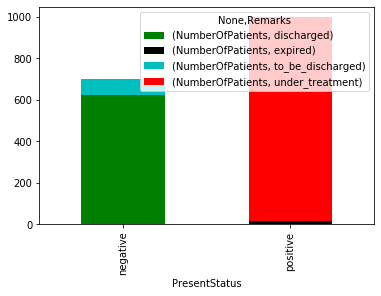

In [12]:
# Current status of admitted positive cases. 
# 'positive' in the barplot includes all patients still under treatment and deceased.
# 'negative' in the barplot includes all patients cured and/or discharged.

p.groupby(["PresentStatus", "Remarks"]).agg(np.sum).unstack(1).plot(kind='bar', stacked=True, color='gkcr')

In [13]:
# Current status in numbers.

p.groupby(["PresentStatus", "Remarks"]).agg(np.sum)

NumberOfPatients
PresentStatus Remarks                           
negative      discharged                     620
              to_be_discharged                81
positive      expired                         14
              under_treatment                984

Text(0.5, 0, 'Total number of +ve cases')

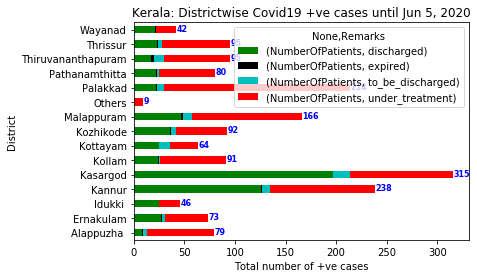

In [14]:
Dist = pd.DataFrame(p.groupby("District").agg(np.sum))
Dist["District"] = Dist.index  # converting the index to a column.

# Horizontal split bar plot for each districts.

p.groupby(["District", "Remarks"]).agg(np.sum).unstack(1).plot(kind='barh', stacked=True, color='gkcr') #plot.barh()
num = list(Dist.NumberOfPatients)
for i, v in enumerate(num):
    plt.text(v+ .5 , i-.1 , str(v), color='b',  fontsize=8,fontweight='bold')
plt.title("Kerala: Districtwise Covid19 +ve cases until Jun 5, 2020")
plt.xlabel("Total number of +ve cases")

In [15]:
print(Dist.columns)
print(Dist.NumberOfPatients.sum())
print(Dist)

Index(['NumberOfPatients', 'District'], dtype='object')
1699
                    NumberOfPatients            District
District                                                
Alappuzha                         79          Alappuzha 
Ernakulam                         73           Ernakulam
Idukki                            46             Idukki 
Kannur                           238              Kannur
Kasargod                         315            Kasargod
Kollam                            91              Kollam
Kottayam                          64            Kottayam
Kozhikode                         92           Kozhikode
Malappuram                       166          Malappuram
Others                             9              Others
Palakkad                         214            Palakkad
Pathanamthitta                    80      Pathanamthitta
Thiruvananthapuram                95  Thiruvananthapuram
Thrissur                          95            Thrissur
Wayanad                    

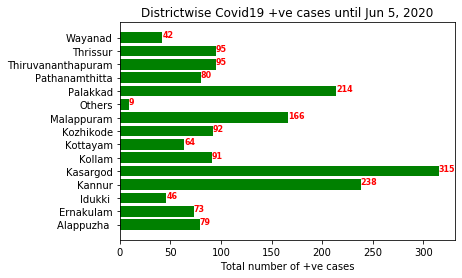

In [17]:
# Horizontal barplot of each district Covid positive cases.

y_pos = np.arange(len(Dist))
 

plt.barh(y_pos, Dist.NumberOfPatients, color = 'g')
#plt.barh(y_pos, Dist.NumberOfPatients)[0].set_color('r')
 
# Create names on the y-axis
plt.yticks(y_pos, Dist.District)
 
# 
num = list(Dist.NumberOfPatients)
for i, v in enumerate(num):
    plt.text(v , i , str(v), color='red',  fontsize=8,fontweight='bold')
    
plt.xlabel("Total number of +ve cases")
plt.title("Districtwise Covid19 +ve cases until Jun 5, 2020")
# Show graphic
plt.show()

In [18]:
# Kerala : Total cases per dates.
p1 = p.sort_index()   # sorting dates.
positiveCasesPerDay = p1.groupby(p1.index)['NumberOfPatients'].sum()

In [19]:
# Kerala : Cumulative number of positive cases.

p1 = p.sort_index()   # sorting dates.
positiveCasesPerDay = p1.groupby(p1.index)['NumberOfPatients'].sum()

# list of positive cases per day.
lst_postv = list(positiveCasesPerDay)

cumu = []
cumsum = 0
for i in range(0,len(lst_postv)):
    cumsum = cumsum + lst_postv[i]
    cumu.append(cumsum)

print(cumsum)  # returns a number.
print(cumu)   # returns list of cumulative numbers on each day.
    
# Making a dataframe of cumulative numbers with timestamp.
df_cumu = pd.DataFrame(cumu)
df_cumu['Date'] = positiveCasesPerDay.index
df_cumu = df_cumu.set_index('Date') # setting datetime as index.


1699
[9, 17, 19, 22, 24, 27, 28, 40, 52, 67, 95, 109, 118, 137, 176, 182, 202, 234, 241, 265, 286, 295, 306, 314, 327, 336, 345, 356, 363, 373, 375, 378, 386, 387, 394, 395, 399, 401, 407, 426, 437, 447, 450, 457, 468, 481, 485, 495, 497, 497, 499, 499, 499, 502, 502, 502, 503, 505, 512, 519, 524, 534, 560, 576, 587, 601, 630, 642, 666, 690, 732, 794, 847, 896, 963, 1003, 1088, 1150, 1208, 1269, 1326, 1412, 1494, 1588, 1699]


In [20]:
# saving it to a csv file.
#df_cumu.to_csv("cumulativeKL.csv", index = False)

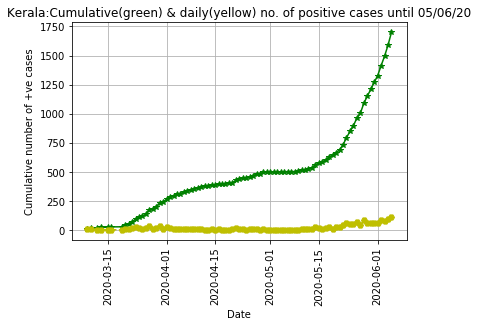

In [22]:
# Plotting graph of cumulative number of cases in Kerala.
plt.plot(df_cumu, marker='*', markersize=6, linestyle='-', color ='g')
plt.plot(positiveCasesPerDay, marker='H', markersize=6, linestyle='--', color ='y')
plt.title('Kerala:Cumulative(green) & daily(yellow) no. of positive cases until 05/06/20')
plt.ylabel('Cumulative number of +ve cases')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid()